In [1]:
import time
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

Let us set teh expected lifetime of the lightbulbs to $x = 2$ hours and $y = 3$ hours.
Our experiments should varify that the probability that $x$ outlasts $y$ is 
$$Pr(x\;outlasts\;y) = \frac{2}{2+3} = 40\%$$

In [2]:
x , y = 2, 3

In [3]:
x_distr = expon(scale=x)
y_distr = expon(scale=y)

In [4]:
def graph_exponential(x_distr, y_distr):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(x_distr.ppf(0.01), x_distr.ppf(0.99), 100)
    y = np.linspace(y_distr.ppf(0.01), y_distr.ppf(0.99), 100)
    ax.plot(x, x_distr.pdf(x), 'r', lw=5, alpha=0.6, label='expon pdf')
    ax.plot(y, y_distr.pdf(y), 'b', lw=5, alpha=0.6, label='expon pdf')
    ax.legend(['x', 'y'])
    ax.set_xlabel(r'Time')
    ax.set_ylabel(r'Probability density')
    ax.set_title('Probability densitfy functions of x and y')

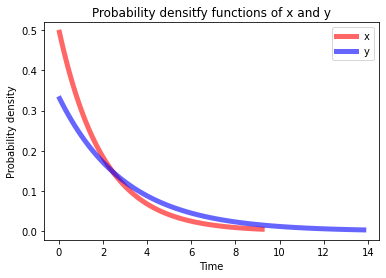

In [5]:
graph_exponential(x_distr, y_distr)

In [6]:
#recursive function to check for wins in a certain range
def check_win_in_step_range(start, stop, numsteps):
    x_wins, y_wins, draws = 0, 0, 0
    steps = np.linspace(start=start, stop=stop, num=numsteps)
    for idx, i in enumerate(steps):
        x_die_prob = x_distr.cdf(i)
        y_die_prob = y_distr.cdf(i)
        
        if np.random.rand() < x_die_prob and np.random.rand() > y_die_prob:
            y_wins += 1
            break
        elif np.random.rand() > x_die_prob and np.random.rand() < y_die_prob:
            x_wins += 1
            break
        elif np.random.rand() < x_die_prob and np.random.rand() < y_die_prob: 
            #in rare cases of "draws" when two bulbs fail together, assume x wins
            #this technically wouldn't happen, but because of the discrete nature of experiments and
            #the limitations of floating point numbers, we end up with forced "draws"
            x_wins += 1
            break
        else:
            pass
    
    return x_wins, y_wins

We run a total of 10000 experiments to find  the number of times x and y won. <br>
We let each experiment run for 10 hours max. <br>
We check for bulb failure every 10/10000 hours, which is about 3.6 seconds <br>
Note: due to the discrete nature of experiments and the limitations of floating point numbers, we end up (very rarely) with forced "draws", i.e., both light bulbs fail together in the same time step. In these very rare cases we'll just assume x won.

In [7]:
num_exper = 10000
max_time = 10
num_steps= 10000 
x_total_wins, y_total_wins = 0, 0
exp_start_time = time.time()

for i in range(num_exper):
    x_wins, y_wins = check_win_in_step_range(0, max_time, num_steps)
    x_total_wins += x_wins
    y_total_wins += y_wins

print(f'Experiment finished in {time.time() - exp_start_time:.2f} seconds')
print(f'Total number of experiments done: {num_exper}')
print(f'Number of times x won: {x_total_wins}')
print(f'Number of times y won: {y_total_wins}')
print(f'Percentage of times x won: {x_total_wins/(x_total_wins+y_total_wins)*100:.2f}%')


Experiment finished in 58.28 seconds
Total number of experiments done: 10000
Number of times x won: 3909
Number of times y won: 6091
Percentage of times x won: 39.09%


We can see that x wins around 40.00% of the time, as expected.